## Introduction to Cargo Time Series endpoint

This notebook will give a tutorial on how to query our cargo movements data, in a time series format through pythonSDK.

In this notebook, we will query data for <b>China Crude Imports</b> as our example.

## Import Libraries

In [3]:
import pandas as pd
import vortexasdk as v
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

c:\Users\OuiWeinJien\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Extract Product & Location ids

Since we are looking for China Crude imports, let's search for those products which contains "Crude" in its name and save it as a variable.

In [4]:
v.Products().search('Crude').to_df(columns = 'all')

2024-09-17 13:20:18,345 vortexasdk.client — WARNING — You are using vortexasdk version 0.73.0, however version 0.73.1 is available.
You should consider upgrading via the 'pip install vortexasdk --upgrade' command.


,id,name,layer.0,leaf,parent.0.name,parent.0.layer.0,parent.0.id,meta.sulphur_min,meta.sulphur_max,meta.api_min,...,hierarchy.0.label,hierarchy.1.id,hierarchy.1.layer,hierarchy.1.label,hierarchy.2.id,hierarchy.2.layer,hierarchy.2.label,hierarchy.3.id,hierarchy.3.layer,hierarchy.3.label
0,1dfa78c965d56ab9d7b953e424d9160e9f79d0275e460c...,Kaliningrad Light Crude,grade,True,Light-Sweet,category,66a98cd9df06660555000f8d4de9bc075e651bce3b57a4...,0.19,0.19,40.0,...,Crude/Condensates,6f11b0724c9a4e85ffa7f1445bc768f054af755a090118...,group_product,Crude,66a98cd9df06660555000f8d4de9bc075e651bce3b57a4...,category,Light-Sweet,1dfa78c965d56ab9d7b953e424d9160e9f79d0275e460c...,grade,Kaliningrad Light Crude
1,257e8c09b75a37909af0a200939e95ef9183b4fb5e2a27...,Crude Coconut Oil,grade,True,Biodiesel Feedstock,category,9d52ede1cff0421a8cd7283b0171afe8d23f519dca5f4e...,,,,...,Biodiesel Feedstock,b68cbb746f8b9098c50e2ba36bcad83001a53bd362e903...,group,Clean Petroleum Products,a75fcc09bfc7d16496de3336551bc52b5891838bb7c223...,group_product,Biodiesel,257e8c09b75a37909af0a200939e95ef9183b4fb5e2a27...,grade,Crude Coconut Oil
2,4ff810b966104a658d22e7155596c11bedcd1e3e81594e...,Yuri Korchagin Crude,grade,True,Light-Sweet,category,66a98cd9df06660555000f8d4de9bc075e651bce3b57a4...,0.13,0.13,,...,Crude,66a98cd9df06660555000f8d4de9bc075e651bce3b57a4...,category,Light-Sweet,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,group,Crude/Condensates,4ff810b966104a658d22e7155596c11bedcd1e3e81594e...,grade,Yuri Korchagin Crude
3,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,Crude/Condensates,group,False,,,,,,33.395866,...,Crude/Condensates,,,,,,,,,
4,5ccb95de3594474bc74fa5d53e71ae2973977617582538...,Crude Palm Kernel Olein,grade,True,Biodiesel Feedstock,category,9d52ede1cff0421a8cd7283b0171afe8d23f519dca5f4e...,,,,...,Biodiesel,b68cbb746f8b9098c50e2ba36bcad83001a53bd362e903...,group,Clean Petroleum Products,9d52ede1cff0421a8cd7283b0171afe8d23f519dca5f4e...,category,Biodiesel Feedstock,5ccb95de3594474bc74fa5d53e71ae2973977617582538...,grade,Crude Palm Kernel Olein
5,6f11b0724c9a4e85ffa7f1445bc768f054af755a090118...,Crude,group_product,False,Crude/Condensates,group,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,,,33.395866,...,Crude/Condensates,6f11b0724c9a4e85ffa7f1445bc768f054af755a090118...,group_product,Crude,,,,,,
6,78610db39212689f5658153d826d0101cc4231a887821a...,Crude Palm Kernel Oil (CPKO),grade,True,Biodiesel Feedstock,category,9d52ede1cff0421a8cd7283b0171afe8d23f519dca5f4e...,,,,...,Clean Petroleum Products,9d52ede1cff0421a8cd7283b0171afe8d23f519dca5f4e...,category,Biodiesel Feedstock,a75fcc09bfc7d16496de3336551bc52b5891838bb7c223...,group_product,Biodiesel,78610db39212689f5658153d826d0101cc4231a887821a...,grade,Crude Palm Kernel Oil (CPKO)
7,98fa8034b122632b13564878dd75d902faa735b822cac9...,Crude Degummed Soybean Oil,grade,True,Biodiesel Feedstock,category,9d52ede1cff0421a8cd7283b0171afe8d23f519dca5f4e...,,,,...,Clean Petroleum Products,a75fcc09bfc7d16496de3336551bc52b5891838bb7c223...,group_product,Biodiesel,9d52ede1cff0421a8cd7283b0171afe8d23f519dca5f4e...,category,Biodiesel Feedstock,98fa8034b122632b13564878dd75d902faa735b822cac9...,grade,Crude Degummed Soybean Oil
8,9c536febc4b03c0294b2347f1adc9d23f5b754e3e5b566...,Domestic Sweet Crude (DSW),grade,True,Light-Sweet,category,66a98cd9df06660555000f8d4de9bc075e651bce3b57a4...,0.24,0.24,39.6,...,Crude,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,group,Crude/Condensates,66a98cd9df06660555000f8d4de9bc075e651bce3b57a4...,category,Light-Sweet,9c536febc4b03c0294b2347f1adc9d23f5b754e3e5b566...,grade,Domestic Sweet Crude (DSW)
9,9fda040ee8844e47b5239051e322d06dd9d2b96f0c3249...,TPAO crude,grade,True,Medium-Sour,category,a7e26956fbb91d786b1d55582981b0d199f72c050958fd...,2.0,2.0,,...,Medium-Sour,6f11b0724c9a4e85ffa7f1445bc768f054af755a090118...,group_product,Crude,54af755a090118dcf9b0724c9a4e9f14745c26165385ff...,group,Crude/Condensates,9fda040ee8844e47b5239051e322d06dd9d2b96f0c3249...,grade,TPAO cru

## Assigning id to variables

In [5]:
crude = [p.id for p in v.Products().search('Crude').to_list() if p.name=='Crude/Condensates']
crude

['54af755a090118dcf9b0724c9a4e9f14745c26165385ffa7f1445bc768f06f11']

In [6]:
china = [p.id for p in v.Geographies().search('China').to_list() if p.name=='China']

## Extract Data from CargoMovements endpoint

### 1. Querying the data by specifying parameters

In [7]:
'''
    All cargo movements for crude imports into China between 1st Jan 2022 to now
    
'''
## 1 query
search_result = v.CargoTimeSeries().search(
    filter_activity="unloading_start", #unloading_start - imports, loading_end - exports, storing_state - floating_storage, any_activity for all movements
    filter_time_min=datetime(2022, 1, 1),
    filter_time_max=datetime.today(),
    filter_products = crude,
    filter_destinations = china,
    intra_movements = 'exclude_intra_country',
    timeseries_unit = 'b',
    timeseries_frequency = 'month' # day, week, month, year
).to_df()

In [9]:
search_result.head()

,key,count,value
0,2022-01-01 00:00:00+00:00,407,298187589
1,2022-02-01 00:00:00+00:00,309,233215959
2,2022-03-01 00:00:00+00:00,421,293081970
3,2022-04-01 00:00:00+00:00,370,273678481
4,2022-05-01 00:00:00+00:00,408,286420211


### 2. Plotting the data using matplotlib

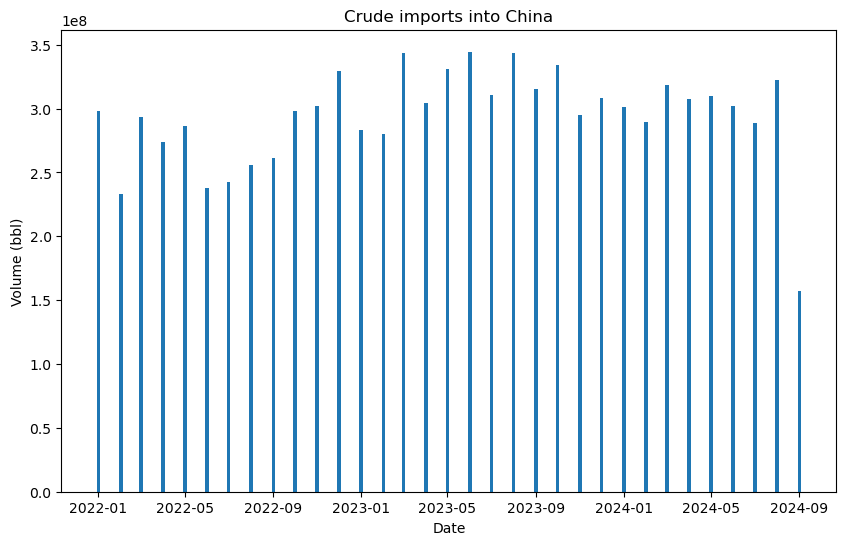

In [13]:
fig = plt.figure(figsize=(10, 6))
plt.bar(search_result['key'], search_result['value'], width = 5)
plt.xlabel('Date')
plt.ylabel('Volume (bbl)')
plt.title('Crude imports into China')
plt.show()

## Conclusion

This notebook illustrates the process of querying cargo movement time series data through the Cargo Time Series endpoint. It begins by retrieving product and location IDs from reference data endpoints like Vessels and Geographies. Once the appropriate parameters are set, the API is called, and plotting library is used to plot the required data.